## Chapter 1 Table of Contents

* [1.1 Assessing the Damage](#1_1)
* [1.2 Initial Droppings](#1_2)
    * [1.2.1 Columns](#1_2_1)
    * [1.2.2 Rows](#1_2_2)
* [1.3 Date and Duration of Protests](#1_3)
* [1.4 'violent_response'](#1_4)
* [1.5 Protester Demands](#1_5)
* [1.6 'protesterviolence'](#1_6)
* [1.7 'notes'](#1_7)
    * [1.7.1 NLP on 'notes'](#1_8)
* [1.8 'protesteridentity'](#1_8)
* [1.9 Final Checks and Exporting](#1_9)

In [1]:
import numpy as np
import pandas as pd

import string
import regex as re
import nltk

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# load data
df = pd.read_csv('../data/protest.csv')

## 1.1 Assessing the Damage <a class="anchor" id="1_1"></a>

In [3]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participantnumber,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,1000.0,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",1000.0,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",500.0,separatist parti quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",100.0,mohawk indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",950.0,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...


In [4]:
df.shape

(17145, 30)

In [5]:
df.isnull().sum().sort_values(ascending=False)

stateresponse6       17129
stateresponse4       16901
protesterdemand3     16762
protesterdemand4     16314
stateresponse5       16296
stateresponse7       16225
stateresponse3       16215
stateresponse2       14257
protesterdemand2     14168
protesteridentity     2461
notes                 1952
stateresponse1        1937
location              1927
sources               1910
protesterdemand1      1907
participantnumber     1906
endyear               1906
endmonth              1906
endday                1906
startyear             1906
startmonth            1906
startday              1906
protesterviolence     1387
country                  0
protestnumber            0
protest                  0
region                   0
year                     0
ccode                    0
id                       0
dtype: int64

## 1.2 Initial Droppings <a class="anchor" id="1_2"></a>

### 1.2.1 Columns We Don't Need<a class="anchor" id="1_2_1"></a>

In [6]:
df.drop(columns = ['id', 'ccode', 'sources', 'location'], inplace = True)

### 1.2.2 Rows We Don't Need<a class="anchor" id="1_2_2"></a>

In [7]:
df.loc[df['protest'] == 0]

# DEFINITELY looks ripe for dropping

,country,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,participantnumber,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,notes
18,Canada,1998,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Canada,1999,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Canada,2001,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Canada,2002,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Canada,2004,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Canada,2013,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Canada,2014,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Cuba,1990,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Cuba,1991,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Cuba,1992,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df[df.protest != 0]

In [9]:
df.drop(columns = 'protest', inplace = True)

## 1.3 Date and Duration of Protests <a class="anchor" id="1_3"></a>

In [10]:
#Get start date of protest
start = ["startyear","startmonth","startday"]
df[start] = df[start].astype(np.int64)
df['startdate'] = df[start].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df['startdate']=pd.to_datetime(df['startdate'])

#Get end date of protest
end = ["endyear","endmonth","endday"]
df[end] = df[end].astype(np.int64)
df['enddate'] = df[end].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df['enddate']=pd.to_datetime(df['enddate'])

#Get length of protest in days
df['protestdays'] = (df['enddate'] - df['startdate']).dt.days + 1
df.head()

,country,year,region,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,participantnumber,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,notes,startdate,enddate,protestdays
0,Canada,1990,North America,1,15,1,1990,15,1,1990,0.0,1000.0,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,1
1,Canada,1990,North America,2,25,6,1990,25,6,1990,0.0,1000.0,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,protestors were only identified as young peopl...,1990-06-25,1990-06-25,1
2,Canada,1990,North America,3,1,7,1990,1,7,1990,0.0,500.0,separatist parti quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,1
3,Canada,1990,North America,4,12,7,1990,6,9,1990,1.0,100.0,mohawk indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,57
4,Canada,1990,North America,5,14,8,1990,15,8,1990,1.0,950.0,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,protests were directed against the state due t...,1990-08-14,1990-08-15,2


In [11]:
df.drop(columns = ['startday', 'startmonth', 'endday', 'endmonth', 'startyear', 'endyear'], inplace = True)

## 1.4 'aggressive_response' <a class="anchor" id="1_4"></a>

In [12]:
df['aggressive_response'] = 0

In [13]:
# Assign 1 or 0 in 'aggressive_response' based on values from 'stateresponse1' to 'stateresponse7'

keywords = ['killings', 'Killings', 'Shootings', 'shootings', 'Beatings', 'beatings', 'Arrests', 'arrests', 'crowd dispersal', 'Crowd Dispersal', ]
df['aggressive_response'] = np.where((df['stateresponse1'].str.contains('|'.join(keywords))) | (df['stateresponse2'].str.contains('|'.join(keywords))) | (df['stateresponse3'].str.contains('|'.join(keywords))) | (df['stateresponse4'].str.contains('|'.join(keywords))) | (df['stateresponse5'].str.contains('|'.join(keywords))) | (df['stateresponse6'].str.contains('|'.join(keywords))) | (df['stateresponse7'].str.contains('|'.join(keywords))),1,0)

In [14]:
# Check that the values are reflected in 'violent_response'
df.head(100)

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,notes,startdate,enddate,protestdays,aggressive_response
0,Canada,1990,North America,1,0.0,1000.0,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,1,0
1,Canada,1990,North America,2,0.0,1000.0,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,protestors were only identified as young peopl...,1990-06-25,1990-06-25,1,0
2,Canada,1990,North America,3,0.0,500.0,separatist parti quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,1,0
3,Canada,1990,North America,4,1.0,100.0,mohawk indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,57,0
4,Canada,1990,North America,5,1.0,950.0,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,protests were directed against the state due t...,1990-08-14,1990-08-15,2,1
5,Canada,1990,North America,6,0.0,200.0,mohawk indians,police brutality,NaN,NaN,NaN,crowd dispersal,shootings,NaN,NaN,NaN,NaN,NaN,canadian army troops today fired tear gas into...,1990-09-19,1990-09-19,1,1
6,Canada,1991,North America,1,0.0,110000.0,public service alliance of canada,labor wage dispute,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"brian mulroney, the embattled conservative pri...",1991-09-10,1991-09-17,8,0
7,Canada,1991,North America,2,0.0,110000.0,public service alliance of canada,labor wage dispute,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,the canadian government introduced mandatory b...,1991-09-28,1991-10-02,5,0
8,Canada,1992,North America,1,1.0,1000.0,gangs of black and white youths,police brutality,NaN,NaN,NaN,arrests,NaN,NaN,NaN,NaN,NaN,NaN,rioting was in response to the killing of a bl...,1992-05-04,1992-05-05,2,1
9,Canada,1993,North America,1,0.0,10000.0,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,tens of thousands of canadians marched in the ...,1993-05-16,1993-05-16,1,0


In [15]:
# Drop dirty, unwanted, and now, unneeded columns

df.drop(columns = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6', 'stateresponse7'], inplace = True)

## 1.5 Protester Demands <a class="anchor" id="1_5"></a>

In [16]:
# There are 7 unique values of protester demands. So, we create 7 columns - one for each value.

df['labor_wage_dispute'] = 0
df['land_farm_issue'] = 0
df['political_behavior_process'] = 0
df['police_brutality'] = 0
df['price_increase_tax_policy'] = 0
df['removal_of_politician'] = 0
df['social_restrictions'] = 0

# I would use get_dummies but I think renaming each column after is more of a hassle XD.

In [17]:
# Assign values to dummy columns based on values from protesterdemand1-4

df['labor_wage_dispute'] = np.where((df['protesterdemand1'].str.contains('labor wage dispute')) | (df['protesterdemand2'].str.contains('labor wage dispute')) | (df['protesterdemand3'].str.contains('labor wage dispute')) | (df['protesterdemand4'].str.contains('labor wage dispute')),1,0)
df['land_farm_issue'] = np.where((df['protesterdemand1'].str.contains('land farm issue')) | (df['protesterdemand2'].str.contains('land farm issue')) | (df['protesterdemand3'].str.contains('land farm issue')) | (df['protesterdemand4'].str.contains('land farm issue')),1,0)
df['political_behavior_process'] = np.where((df['protesterdemand1'].str.contains('political behavior, process')) | (df['protesterdemand2'].str.contains('political behavior, process')) | (df['protesterdemand3'].str.contains('political behavior, process')) | (df['protesterdemand4'].str.contains('political behavior, process')),1,0)
df['police_brutality'] = np.where((df['protesterdemand1'].str.contains('police brutality')) | (df['protesterdemand2'].str.contains('police brutality')) | (df['protesterdemand3'].str.contains('police brutality')) | (df['protesterdemand4'].str.contains('police brutality')),1,0)
df['price_increase_tax_policy'] = np.where((df['protesterdemand1'].str.contains('price increases, tax policy')) | (df['protesterdemand2'].str.contains('price increases, tax policy')) | (df['protesterdemand3'].str.contains('price increases, tax policy')) | (df['protesterdemand4'].str.contains('price increases, tax policy')),1,0)
df['removal_of_politician'] = np.where((df['protesterdemand1'].str.contains('removal of politician')) | (df['protesterdemand2'].str.contains('removal of politician')) | (df['protesterdemand3'].str.contains('removal of politician')) | (df['protesterdemand4'].str.contains('removal of politician')),1,0)
df['social_restrictions'] = np.where((df['protesterdemand1'].str.contains('social restrictions')) | (df['protesterdemand2'].str.contains('social restrictions')) | (df['protesterdemand3'].str.contains('social restrictions')) | (df['protesterdemand4'].str.contains('social restrictions')),1,0)

In [18]:
# Drop dirty, unwanted, and now, unneeded columns

df.drop(columns = ['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4'], inplace = True)

In [19]:
df.head(100)

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions
0,Canada,1990,North America,1,0.0,1000.0,unspecified,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,1,0,1,0,1,0,0,0,0
1,Canada,1990,North America,2,0.0,1000.0,unspecified,protestors were only identified as young peopl...,1990-06-25,1990-06-25,1,0,0,0,1,0,0,0,0
2,Canada,1990,North America,3,0.0,500.0,separatist parti quebecois,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,1,0,0,0,1,0,0,0,0
3,Canada,1990,North America,4,1.0,100.0,mohawk indians,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,57,0,0,1,0,0,0,0,0
4,Canada,1990,North America,5,1.0,950.0,local residents,protests were directed against the state due t...,1990-08-14,1990-08-15,2,1,0,0,1,0,0,0,0
5,Canada,1990,North America,6,0.0,200.0,mohawk indians,canadian army troops today fired tear gas into...,1990-09-19,1990-09-19,1,1,0,0,0,1,0,0,0
6,Canada,1991,North America,1,0.0,110000.0,public service alliance of canada,"brian mulroney, the embattled conservative pri...",1991-09-10,1991-09-17,8,0,1,0,0,0,0,0,0
7,Canada,1991,North America,2,0.0,110000.0,public service alliance of canada,the canadian government introduced mandatory b...,1991-09-28,1991-10-02,5,0,1,0,0,0,0,0,0
8,Canada,1992,North America,1,1.0,1000.0,gangs of black and white youths,rioting was in response to the killing of a bl...,1992-05-04,1992-05-05,2,1,0,0,0,1,0,0,0
9,Canada,1993,North America,1,0.0,10000.0,unspecified,tens of thousands of canadians marched in the ...,1993-05-16,1993-05-16,1,0,0,0,1,0,0,0,0


## 1.6 'protesterviolence' <a class="anchor" id="1_6"></a>

In [20]:
# 'protesterviolence' is a binary variable where 1 = protesters engaged in violence against state and 0 = otherwise.
# This will likely be a useful columns, so we'll keep it but convert its values to int

df['protesterviolence'] = df['protesterviolence'].astype(int)

In [21]:
df.head()

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions
0,Canada,1990,North America,1,0,1000.0,unspecified,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,1,0,1,0,1,0,0,0,0
1,Canada,1990,North America,2,0,1000.0,unspecified,protestors were only identified as young peopl...,1990-06-25,1990-06-25,1,0,0,0,1,0,0,0,0
2,Canada,1990,North America,3,0,500.0,separatist parti quebecois,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,1,0,0,0,1,0,0,0,0
3,Canada,1990,North America,4,1,100.0,mohawk indians,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,57,0,0,1,0,0,0,0,0
4,Canada,1990,North America,5,1,950.0,local residents,protests were directed against the state due t...,1990-08-14,1990-08-15,2,1,0,0,1,0,0,0,0


## 1.7 'notes' <a class="anchor" id="1_7"></a>

In [22]:
df[df['notes'].isnull()]

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions
440,Mexico,1991,North America,2,0,20000.0,opposition parties,NaN,1991-08-25,1991-08-25,1,0,0,0,1,0,0,0,0
467,Mexico,1995,North America,7,0,70000.0,independent unions and leftist political groups,NaN,1995-05-01,1995-05-01,1,0,0,0,1,0,0,0,0
665,Guatemala,2013,Central America,2,0,100.0,NaN,NaN,2013-04-12,2013-04-12,1,1,0,0,1,0,0,0,0
1258,Venezuela,1992,South America,7,1,1000000.0,venezualians,NaN,1992-03-10,1992-03-10,1,1,0,0,1,0,0,0,0
1295,Venezuela,1994,South America,10,0,50.0,congressional workers,NaN,1994-11-22,1994-11-22,1,0,1,0,0,0,0,0,0
1679,Ecuador,1993,South America,5,0,1000.0,teachers and students,NaN,1993-10-22,1993-10-23,2,0,1,0,1,0,0,0,0
1718,Ecuador,2000,South America,2,1,50.0,ecuadorians,NaN,2000-01-12,2000-01-12,1,1,0,0,1,0,0,0,0
2419,Paraguay,2010,South America,2,0,50.0,paraguayans,NaN,2010-09-24,2010-09-24,1,0,0,0,1,0,0,0,0
7294,Russia,2012,Europe,11,0,3000.0,occupy abai,NaN,2012-05-06,2012-05-16,11,1,0,0,1,0,0,0,0
7616,Ukraine,2002,Europe,1,0,1000.0,opposition supporters,NaN,2002-09-16,2002-09-16,1,1,0,0,0,0,0,1,0


In [23]:
df['notes'] = df['notes'].fillna(value = '')

#### Data Cleaning using NLP:
    Remove Stopwords
    Remove punctuations
    Tokenization
    Lemmatization

In [24]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

In [25]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    
    # apply lemmatizing and stopwords exclusion within the same step
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    
    return text

In [26]:
df['notes_lemmatized'] = df['notes'].apply(lambda x: clean_text(x))

In [27]:
df.head(1)

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions,notes_lemmatized
0,Canada,1990,North America,1,0,1000.0,unspecified,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,1,0,1,0,1,0,0,0,0,"[canada, railway, passenger, system, finally, ..."


## 1.8 'protesteridentity' <a class="anchor" id="1_8"></a>

In [28]:
df.shape

(15239, 20)

In [29]:
df.isnull().sum().sort_values(ascending=False)

protesteridentity             555
country                         0
aggressive_response             0
social_restrictions             0
removal_of_politician           0
price_increase_tax_policy       0
police_brutality                0
political_behavior_process      0
land_farm_issue                 0
labor_wage_dispute              0
protestdays                     0
year                            0
enddate                         0
startdate                       0
notes                           0
participantnumber               0
protesterviolence               0
protestnumber                   0
region                          0
notes_lemmatized                0
dtype: int64

In [30]:
# Replacing unspecified:
df['protesteridentity'].replace('unspecified','protesters',inplace=True)

In [31]:
# Replacing null values with 'protesters': 
df['protesteridentity'].fillna('protesters', inplace = True)

In [32]:
# To check
df.isnull().sum().sort_values(ascending=False)

country                       0
year                          0
social_restrictions           0
removal_of_politician         0
price_increase_tax_policy     0
police_brutality              0
political_behavior_process    0
land_farm_issue               0
labor_wage_dispute            0
aggressive_response           0
protestdays                   0
enddate                       0
startdate                     0
notes                         0
protesteridentity             0
participantnumber             0
protesterviolence             0
protestnumber                 0
region                        0
notes_lemmatized              0
dtype: int64

In [33]:
df.head()

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions,notes_lemmatized
0,Canada,1990,North America,1,0,1000.0,protesters,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,1,0,1,0,1,0,0,0,0,"[canada, railway, passenger, system, finally, ..."
1,Canada,1990,North America,2,0,1000.0,protesters,protestors were only identified as young peopl...,1990-06-25,1990-06-25,1,0,0,0,1,0,0,0,0,"[protestors, identified, young, people, gather..."
2,Canada,1990,North America,3,0,500.0,separatist parti quebecois,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,1,0,0,0,1,0,0,0,0,"[queen, calling, canadian, remain, united, bra..."
3,Canada,1990,North America,4,1,100.0,mohawk indians,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,57,0,0,1,0,0,0,0,0,"[canada, federal, government, agreed, acquire,..."
4,Canada,1990,North America,5,1,950.0,local residents,protests were directed against the state due t...,1990-08-14,1990-08-15,2,1,0,0,1,0,0,0,0,"[protest, directed, state, due, refusal, use, ..."


In [34]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

In [35]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    
    # apply lemmatizing and stopwords exclusion within the same step
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    text = (' '.join(text))
    return text

In [36]:
df['protesteridentity'] = df['protesteridentity'].apply(lambda x: clean_text(x))

In [37]:
df.head(400)

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions,notes_lemmatized
0,Canada,1990,North America,1,0,1000.0,protester,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,1,0,1,0,1,0,0,0,0,"[canada, railway, passenger, system, finally, ..."
1,Canada,1990,North America,2,0,1000.0,protester,protestors were only identified as young peopl...,1990-06-25,1990-06-25,1,0,0,0,1,0,0,0,0,"[protestors, identified, young, people, gather..."
2,Canada,1990,North America,3,0,500.0,separatist parti quebecois,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,1,0,0,0,1,0,0,0,0,"[queen, calling, canadian, remain, united, bra..."
3,Canada,1990,North America,4,1,100.0,mohawk indian,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,57,0,0,1,0,0,0,0,0,"[canada, federal, government, agreed, acquire,..."
4,Canada,1990,North America,5,1,950.0,local resident,protests were directed against the state due t...,1990-08-14,1990-08-15,2,1,0,0,1,0,0,0,0,"[protest, directed, state, due, refusal, use, ..."
5,Canada,1990,North America,6,0,200.0,mohawk indian,canadian army troops today fired tear gas into...,1990-09-19,1990-09-19,1,1,0,0,0,1,0,0,0,"[canadian, army, troop, today, fired, tear, ga..."
6,Canada,1991,North America,1,0,110000.0,public service alliance canada,"brian mulroney, the embattled conservative pri...",1991-09-10,1991-09-17,8,0,1,0,0,0,0,0,0,"[brian, mulroney, embattled, conservative, pri..."
7,Canada,1991,North America,2,0,110000.0,public service alliance canada,the canadian government introduced mandatory b...,1991-09-28,1991-10-02,5,0,1,0,0,0,0,0,0,"[canadian, government, introduced, mandatory, ..."
8,Canada,1992,North America,1,1,1000.0,gang black white youth,rioting was in response to the killing of a bl...,1992-05-04,1992-05-05,2,1,0,0,0,1,0,0,0,"[rioting, response, killing, black, canadian, ..."
9,Canada,1993,North America,1,0,10000.0,protester,tens of thousands of canadians marched in the ...,1993-05-16,1993-05-16,1,0,0,0,1,0,0,0,0,"[ten, thousand, canadian, marched, capital, to..."


#### Vectorize text in prep for analysis
We will need to vectorize our words, for our models to process them

In [38]:
# initialise countvectorizer
cvec = CountVectorizer()
# fit and transform vectorizer
word_counts = cvec.fit_transform(df['protesteridentity'])

In [39]:
type(word_counts)

scipy.sparse.csr.csr_matrix

In [40]:
# make it a dataframe
counts = pd.DataFrame(word_counts.todense(), columns=cvec.get_feature_names())

In [41]:
print('Total No. of Words in the Post Column: ', counts.sum().sum())

Total No. of Words in the Post Column:  40782


In [42]:
type(counts)

pandas.core.frame.DataFrame

In [43]:
counts.sum().sort_values(ascending=False).head(500).T

protester              3109
student                1572
worker                 1184
supporter               953
opposition              942
party                   730
union                   709
anti                    569
activist                565
farmer                  447
resident                428
demonstrator            399
pro                     380
teacher                 349
group                   337
university              315
woman                   304
youth                   289
people                  288
government              285
national                280
democracy               274
movement                273
democratic              236
right                   220
member                  209
trade                   206
civil                   195
muslim                  192
driver                  189
front                   185
demanding               181
president               161
public                  154
association             146
local               

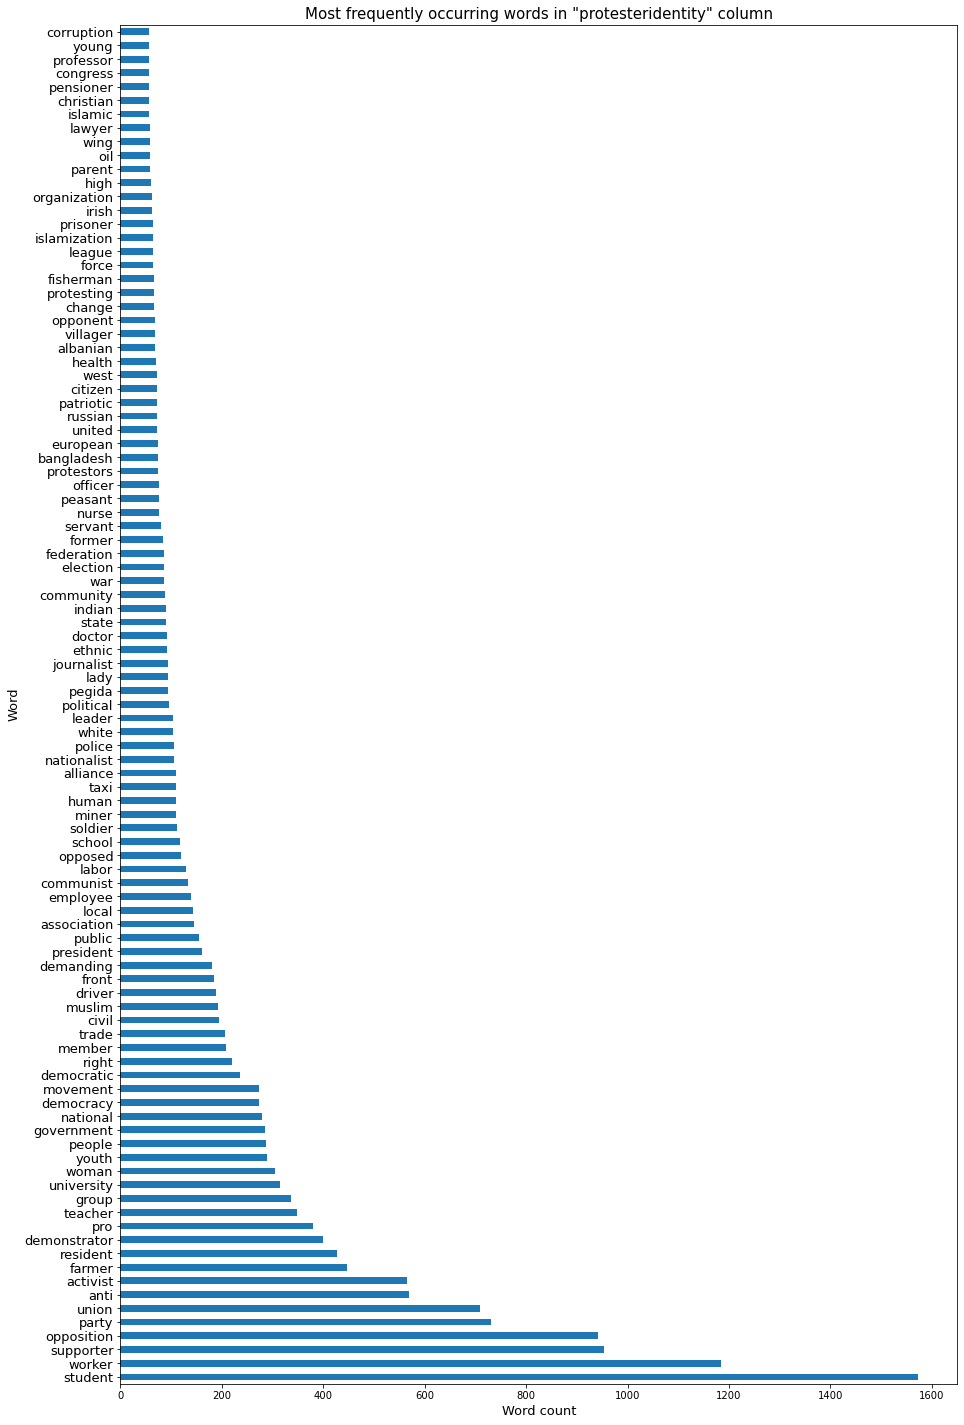

In [44]:
plt.figure(figsize=(15,25))
counts.sum().sort_values(ascending=False).head(100)[1:].plot(kind='barh');
plt.title('Most frequently occurring words in "protesteridentity" column', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

Based on the above data, we can see that other than the generic word 'protester' which refers to any group of unspecified protesters, some of the keywords occuring in protesteridentity are 'student', 'worker', 'supporter', 'opposition', 'party', 'activist', 'farmer', 'teacher', 'university', 'youth', 'woman', 'government', and 'democracy'.

The high involvement of students and teachers could point to a lot of education-related issues, or in the case of the former, might simply a generally high involvement in various protests from students.

The frequent occurrence of 'worker', 'union', and 'labor' could indicate unemployment or labor related issues.

An interesting one to note is that 'indian' mostly occurs in protests located in North and South America, highly likely refering to Native Americans rather than the ethnic Indians from India.

'woman' is also a frequently occurring word, which could be due to an increasing number of women's rights issues being highlighted in the quest for a more equal society.

The most political top words 'supporter', 'opposition', 'party', 'anti', and 'government' could be related to any number of issues resulting in protesting against a ruling government.

#### Categorization

Moving forward, we're going to categorize these protester identities to the best of our abilities by grouping together synonyms such as 'student' and 'pupil' under the 'student' category, or simply grouping together different indegenious people under one category. This should allow us to have a more macro perspective of the type of protester groups that are most frequently involved in protests.

In [45]:
# Assign 1 or 0 in 'abortion' based on values from 'protesteridentity'

keywords = ['abortion', 'abortions']
df['abortion'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [46]:
# Assign 1 or 0 in 'activists' based on values from 'protesteridentity'

keywords = ['activist', 'activists']
df['activists'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [47]:
# Assign 1 or 0 in 'anti_democracy' based on values from 'protesteridentity'

keywords = ['communist', 'communists', 'communism', 'socialist', 'socialists', 'socialism', 'marxist', 'marxists', 'leninist', 'leninists', 'anarchist', 'anarchists', 'nazi', 'nazis']
df['anti_democracy'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [48]:
# Assign 1 or 0 in 'democracy' based on values from 'protesteridentity'

keywords = ['democracy', 'democratic']
df['democracy'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [49]:
# Assign 1 or 0 in 'opposition' based on values from 'protesteridentity'

keywords = ['opposition']
df['opposition'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [50]:
# Assign 1 or 0 in 'educators' based on values from 'protesteridentity'

keywords = ['teacher', 'teachers', 'professor', 'professors', 'educator', 'educators']
df['educators'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [51]:
# Assign 1 or 0 in 'environmental' based on values from 'protesteridentity'

keywords = ['environmental', 'environmentalist', 'enviromentalists']
df['environmental'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [52]:
# Assign 1 or 0 in 'human_rights' based on values from 'protesteridentity'

keywords = ['human']
df['human_rights'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [53]:
# Assign 1 or 0 in 'immigrants' based on values from 'protesteridentity'

keywords = ['immigrant', 'migrant', 'immigrants', 'migrants']
df['immigrants'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [54]:
# Assign 1 or 0 in 'ethnic_discrimination' based on values from 'protesteridentity'

keywords = ['kurd', 'kurds', 'black', 'blacks', 'tamil', 'tamils', 'uighur', 'uighurs', 'indian', 'indians', 'aborigine', 'aborigines', 'aboriginal', 'aboriginals', 'indigenous', 'indegenous', 'tibet', 'tibetan', 'mongol', 'mongolian']
df['ethnic_discrimination'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [55]:
# Assign 1 or 0 in 'lgbtq' based on values from 'protesteridentity'

keywords = ['lesbian', 'gay', 'bisexual', 'transgender', 'homosexual', 'lesbians', 'gays', 'bisexuals', 'transgenders', 'homosexuals']
df['lgbtq'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [56]:
# Assign 1 or 0 in 'local_residents' based on values from 'protesteridentity'

keywords = ['local', 'locals', 'resident', 'residents']
df['local_residents'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [57]:
# Assign 1 or 0 in 'peasants_villagers' based on values from 'protesteridentity'

keywords = ['peasant', 'peasants', 'village', 'villager', 'villagers']
df['peasants_villagers'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [58]:
# Assign 1 or 0 in 'refugees' based on values from 'protesteridentity'

keywords = ['refugee', 'refugees']
df['refugees'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [59]:
# Assign 1 or 0 in 'religion' based on values from 'protesteridentity'

keywords = ['muslim', 'muslims', 'islam', 'islamic', 'islamist', 'islamists', 'islami', 'christian', 'christians', 'catholic', 'catholics', 'buddhist', 'buddhists', 'monk', 'monks', 'hindu', 'hindus', 'sikh', 'sikhs', 'priest', 'priests', 'jew', 'jews']
df['religion'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [60]:
# Assign 1 or 0 in 'separatist_independence' based on values from 'protesteridentity'

keywords = ['separatist', 'separatists', 'independence']
df['separatist_independence'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [61]:
# Assign 1 or 0 in 'students' based on values from 'protesteridentity'

keywords = ['student', 'students', 'pupil', 'pupils', 'schoolchildren']
df['students'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [62]:
# Assign 1 or 0 in 'veterans' based on values from 'protesteridentity'

keywords = ['veteran', 'veterans']
df['veterans'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [63]:
# Assign 1 or 0 in 'men' based on values from 'protesteridentity'

keywords = ['men', 'male', 'males' 'boy', 'father', 'son', 'fathers', 'sons', 'boys']
df['men'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [64]:
# Assign 1 or 0 in 'women' based on values from 'protesteridentity'

keywords = ['women', 'ladies', 'woman', 'lady', 'girl', 'female', 'females', 'mother', 'daughter', 'mothers', 'daughters']
df['women'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [65]:
# Assign 1 or 0 in 'agriculture' based on values from 'protesteridentity' (farming, fishing)

keywords = ['farmer', 'farmers', 'agriculture', 'fishermen', 'fisherman', 'fish']
df['agriculture'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [66]:
# Assign 1 or 0 in 'white_collar' based on values from 'protesteridentity' (finance, medicine, law, media)

keywords = ['bank', 'finance', 'insurance', 'journalist', 'journalists', 'reporter', 'reporters', 'lawyer', 'judge', 'lawyers', 'judges', 'court', 'doctor', 'doctors', 'nurse', 'nurses', 'medical', 'medicine']
df['white_collar'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [67]:
# Assign 1 or 0 in 'blue_collar' based on values from 'protesteridentity' (workers, labor, miners, transport, traders)

keywords = ['miner', 'miners', 'mine', 'mines', 'trader', 'traders', 'merchant', 'merchants', 'transport', 'transportation', 'driver', 'drivers', 'bus', 'buses', 'taxi', 'taxis', 'train', 'trains', 'worker', 'labor', 'labour', 'workers', 'laborer', 'laborers', 'labourer', 'labourers']
df['blue_collar'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [68]:
# Assign 1 or 0 in 'unemployed' based on values from 'protesteridentity'

keywords = ['unemployed', 'jobless', 'unemployment', 'employment']
df['unemployed'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [69]:
# Assign 1 or 0 in 'youths' based on values from 'protesteridentity'

keywords = ['youth', 'young', 'child', 'children', 'youths']
df['youths'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [70]:
# Assign 1 or 0 in 'unspecified_protesters' to all rows that are not in 'protester_groups'

keywords = ['protester', 'protesters', 'protestor', 'protestors']
df['unspecified_protesters'] = np.where((df['protesteridentity'].str.contains('|'.join(keywords))),1,0)

In [71]:
df[['abortion', 'activists', 'anti_democracy', 'democracy', 'educators', 'environmental', 'human_rights', 'immigrants', 'ethnic_discrimination', 'lgbtq', 'local_residents', 'opposition', 'peasants_villagers', 'refugees', 'religion', 'separatist_independence', 'students', 'veterans', 'men', 'women', 'agriculture', 'white_collar', 'blue_collar', 'unemployed', 'youths', 'unspecified_protesters']].astype(bool).sum(axis=0).sort_values(ascending=False)

unspecified_protesters     3182
blue_collar                1744
students                   1572
men                        1012
opposition                  940
local_residents             718
activists                   563
religion                    544
agriculture                 510
democracy                   505
women                       437
youths                      408
educators                   386
white_collar                366
ethnic_discrimination       282
anti_democracy              232
peasants_villagers          154
human_rights                107
immigrants                   81
separatist_independence      77
unemployed                   63
environmental                55
lgbtq                        53
veterans                     46
refugees                     27
abortion                     24
dtype: int64

## 1.9 Final Checks and Exporting <a class="anchor" id="1_9"></a>

In [72]:
df.head()

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions,notes_lemmatized,abortion,activists,anti_democracy,democracy,opposition,educators,environmental,human_rights,immigrants,ethnic_discrimination,lgbtq,local_residents,peasants_villagers,refugees,religion,separatist_independence,students,veterans,men,women,agriculture,white_collar,blue_collar,unemployed,youths,unspecified_protesters
0,Canada,1990,North America,1,0,1000.0,protester,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,1,0,1,0,1,0,0,0,0,"[canada, railway, passenger, system, finally, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Canada,1990,North America,2,0,1000.0,protester,protestors were only identified as young peopl...,1990-06-25,1990-06-25,1,0,0,0,1,0,0,0,0,"[protestors, identified, young, people, gather...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Canada,1990,North America,3,0,500.0,separatist parti quebecois,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,1,0,0,0,1,0,0,0,0,"[queen, calling, canadian, remain, united, bra...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Canada,1990,North America,4,1,100.0,mohawk indian,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,57,0,0,1,0,0,0,0,0,"[canada, federal, government, agreed, acquire,...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Canada,1990,North America,5,1,950.0,local resident,protests were directed against the state due t...,1990-08-14,1990-08-15,2,1,0,0,1,0,0,0,0,"[protest, directed, state, due, refusal, use, ...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
df.to_csv('../data/protest_cleaned_STARWARS.csv', index=False)